****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Imports for Python

In [1]:
# Import Pandas and Json modules
import pandas as pd
import json
from pandas.io.json import json_normalize

In [2]:
# Import additional libraries needed
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

## Import World Bank Projects Data

In [3]:
# Read source data

WB_data=pd.read_json(r'C:\Users\l_gas\Documents\Development\SpringBoard_DataScience\Unit5\MiniProject\1574117884_data_wrangling_json_5_\data_wrangling_json\data\world_bank_projects.json')


In [4]:
# Identify source data structure/type
print(type(WB_data))
print(WB_data.index)
print(WB_data.shape)
print(WB_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=500, step=1)
(500, 50)
Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')


## 1 - List the 10 countries with most projects

In [5]:
# First we need to confirm there is one entry for each project in the table. 
# One of the fields is the project name, so we check there are distinct names on each row.

proj_cnt=Counter(WB_data['project_name'])
proj_cnt.most_common(1)

[('Ethiopia General Education Quality Improvement Project II', 1)]

In [6]:
# Count the number projects per country and list the top 10 countries 
# along with the number of projects they have.

country_proj=Counter(WB_data['countryname'])
top10_countries=pd.DataFrame(country_proj.most_common(10))
top10_countries.columns=['Country Name', 'World Bank Projects']
top10_countries = top10_countries.set_index('Country Name')
print(top10_countries)

                                 World Bank Projects
Country Name                                        
People's Republic of China                        19
Republic of Indonesia                             19
Socialist Republic of Vietnam                     17
Republic of India                                 16
Republic of Yemen                                 13
Kingdom of Morocco                                12
Nepal                                             12
People's Republic of Bangladesh                   12
Republic of Mozambique                            11
Africa                                            11


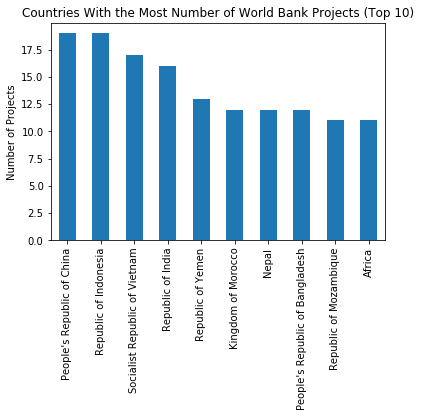

In [7]:
# Create a bar chart showing the number of World Bank Projects in the top 10 Coutries
top10_countries.plot(kind='bar')
plt.title("Countries With the Most Number of World Bank Projects (Top 10)")
plt.ylabel("Number of Projects")
plt.xlabel("")
plt.gca().legend_.remove()
plt.show()

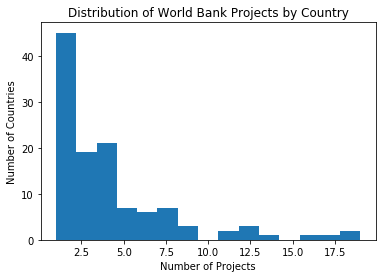

In [8]:
# Create a histogram showing the distribution of projects accross all countries
country_proj_df = pd.DataFrame(country_proj.values())
country_proj_df.plot(kind='hist', bins=15)
plt.xlabel("Number of Projects")
plt.ylabel("Number of Countries")
plt.title("Distribution of World Bank Projects by Country")
plt.gca().legend_.remove()
plt.show()

## 2 - List the top 10 major project themes

In [9]:
# The column mjtheme_namecode contains a list of dictionary type elements, with the theme code as the key and the theme 
# description as the value.
WB_data['mjtheme_namecode'].head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [10]:
# Note that each project may have more than one theme, or the same theme may have been entered multiple times in the same field.
# Before counting projects under each theme we generate a dataframe with a column for the theme code, and a separate column for 
# the theme name. We also generate separate lines for every theme under each project with no duplicates.

# Select theme name and code column and reshape the data frame. 
mjtheme=WB_data['mjtheme_namecode']
mjtheme_df=pd.DataFrame()
for i in range(500):
    df_proj=pd.DataFrame(mjtheme[i])
    df_proj['rownum'] = i
    mjtheme_df=mjtheme_df.append(df_proj)

print("Dataframe with project/theme Combination - no cleaning (duplicate entries and missing names)")
print(mjtheme_df.shape)

print("Dataframe project/theme Combination - Keep unique project/theme code entries")
mjtheme_nodup = mjtheme_df[['rownum','code']].drop_duplicates()
print(mjtheme_nodup.shape)

top10_themes=pd.DataFrame(Counter(mjtheme_nodup['code']).most_common(10))
top10_themes.columns=['Theme Code','Number of Projects']
print("Top 10")
print(top10_themes)

Dataframe with project/theme Combination - no cleaning (duplicate entries and missing names)
(1499, 3)
Dataframe project/theme Combination - Keep unique project/theme code entries
(1070, 2)
Top 10
  Theme Code  Number of Projects
0         11                 157
1         10                 148
2          2                 140
3          8                 128
4          4                 119
5          6                 116
6          7                 114
7          5                  61
8          9                  40
9          1                  33


In [11]:
# We can add the theme names to the output

mjtheme_df = mjtheme_df.reset_index()
rowsel = mjtheme_df[mjtheme_df['name'] != ""]
code_names = rowsel[['code','name']].drop_duplicates().sort_values('code')

cd_names_dict = pd.Series(code_names.name.values,index=code_names.code).to_dict()

top10_themes['Theme Name'] = top10_themes['Theme Code'].map(cd_names_dict)
print(top10_themes)


  Theme Code  Number of Projects                                    Theme Name
0         11                 157  Environment and natural resources management
1         10                 148                             Rural development
2          2                 140                      Public sector governance
3          8                 128                             Human development
4          4                 119      Financial and private sector development
5          6                 116         Social protection and risk management
6          7                 114                   Social dev/gender/inclusion
7          5                  61                         Trade and integration
8          9                  40                             Urban development
9          1                  33                           Economic management


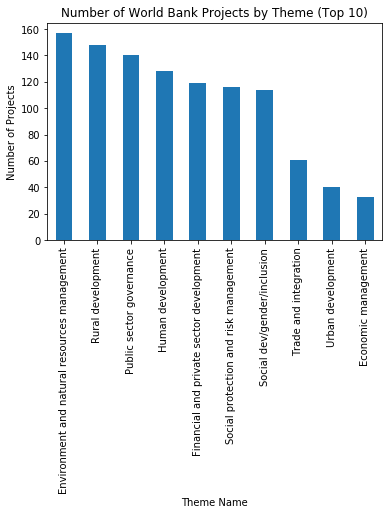

In [12]:
# Create a histogram showing the distribution number of projects
top10_themes.set_index('Theme Name').plot(kind='bar')
plt.ylabel("Number of Projects")
plt.title("Number of World Bank Projects by Theme (Top 10)")
plt.gca().legend_.remove()
plt.show()

## 3 - Create a Data Frame with no missing project theme description

In [13]:
# We can use the dictionary created under question 2 and apply it to the original dataframe.

# The original dataframe has three columns with information on project theme: theme name (mjtheme),
# theme code (mjthemecode), and a hashable table type column with the theme code and its corresponding
# theme name. The third column seems to have been derived from the first two. 
# I'm going to reconstruct the theme name column.

mjthemecode_df = WB_data.mjthemecode.str.split(",",expand=True)
mjtheme_cmplt = [mjthemecode_df.loc[:,j].map(cd_names_dict) for j in range(5)]
mjtheme_cmplt = pd.DataFrame(mjtheme_cmplt).transpose()
WB_data['mjtheme_filled']=np.nan
WB_data['mjtheme_filled']=mjtheme_cmplt.values.tolist()
#for i in range(len(WB_data.mjthemecode)):
#  WB_data.mjtheme_filled[i]=mjtheme_cmplt.values.tolist()[i]
print(WB_data[['mjthemecode','mjtheme_filled']].head())


  mjthemecode                                     mjtheme_filled
0        8,11  [Human development, Environment and natural re...
1         1,6  [Economic management, Social protection and ri...
2    5,2,11,6  [Trade and integration, Public sector governan...
3         7,7  [Social dev/gender/inclusion, Social dev/gende...
4         5,4  [Trade and integration, Financial and private ...
